# Data Visualization with Python Studio

At this point, you should already have connected with the rest of your group to divide up who is going to do what. 

Use this notebook to create your visualizations.

Below, we set up the dataframe with the Goodreads dataset for you. 

If you run this cell, you may get an error that some lines were skipped. Do not worry about that! 

For this studio, we want to focus on creating an effective visualization.

In [1]:
# Here is the setup of the dataframe. Feel free to use .info() or .head() to 
## get a better understanding of what is inside the dataframe!

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("books.csv", on_bad_lines='skip')

years = []

for y in df['publication_date']:
    date = y.split("/")
    years.append(date[2])

df["year"] = years

df.head()


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004


With your dataframe set up, time to start creating visualizations!

In [2]:
df.columns = df.columns.str.strip()

In [3]:
for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].unique())


--- bookID ---
[    1     2     4 ... 45634 45639 45641]

--- title ---
['Harry Potter and the Half-Blood Prince (Harry Potter  #6)'
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)'
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)' ...
 'The Ice-Shirt (Seven Dreams #1)' 'Poor People'
 'Las aventuras de Tom Sawyer']

--- authors ---
['J.K. Rowling/Mary GrandPré' 'J.K. Rowling' 'W. Frederick Zimmerman' ...
 'C.S. Lewis/Ana Falcão Bastos'
 'C.S. Lewis/Pauline Baynes/Ana Falcão Bastos'
 'William T. Vollmann/Larry McCaffery/Michael Hemmingson']

--- average_rating ---
[4.57 4.49 4.42 4.56 4.78 3.74 4.73 4.38 4.22 4.21 3.44 3.87 4.07 3.9
 3.83 3.86 3.91 3.93 4.59 4.5  4.36 4.53 3.84 3.72 4.   3.88 4.33 3.45
 3.76 3.6  4.06 4.17 3.55 3.98 4.13 3.95 4.24 4.34 3.92 4.23 3.75 3.94
 3.77 4.46 3.68 3.99 3.25 3.89 3.82 3.78 4.01 4.35 4.28 3.34 3.67 3.48
 3.5  3.62 4.27 3.39 4.12 4.08 4.05 3.85 2.99 4.19 3.71 4.2  3.65 3.4
 4.11 3.42 4.02 3.69 4.1  3.66 4.61 4.04 3.97 4.1

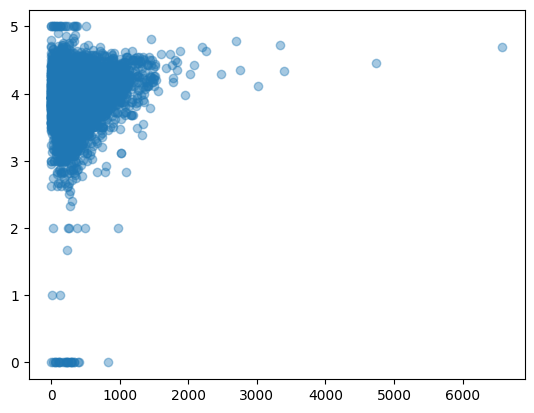

In [4]:
# Use your Python skills to create a visualization here.
plt.scatter(df["num_pages"], df["average_rating"], alpha=0.4)

In [ ]:
# Use your Python skills to create a visualization here.
top_publisher = df['publisher'].value_counts()
top_25 = top_publisher.head(25).index
top_25

Index(['Vintage', 'Penguin Books', 'Penguin Classics', 'Mariner Books',
       'Ballantine Books', 'Harper Perennial', 'HarperCollins', 'Pocket Books',
       'Bantam', 'VIZ Media LLC', 'Berkley', 'Dover Publications',
       'Modern Library', 'Del Rey', 'Tor Books', 'Grand Central Publishing',
       'Oxford University Press  USA', 'Oxford University Press', 'Scribner',
       'W. W. Norton  Company', 'Cambridge University Press', 'Signet',
       'Simon  Schuster', 'Anchor', 'William Morrow Paperbacks'],
      dtype='object', name='publisher')

In [22]:
top25_avg_ratings = (df[df['publisher'].isin(top_25)].groupby('publisher')['average_rating'].mean().sort_values(ascending=False))
print(top25_avg_ratings)

publisher
VIZ Media LLC                   4.242614
Del Rey                         4.041625
HarperCollins                   4.036875
W. W. Norton  Company           4.004118
Modern Library                  3.971829
Dover Publications              3.953882
Oxford University Press  USA    3.950667
Penguin Classics                3.944565
Signet                          3.944545
Mariner Books                   3.933533
Cambridge University Press      3.931667
Simon  Schuster                 3.925231
Grand Central Publishing        3.922500
Penguin Books                   3.920383
Pocket Books                    3.903153
Anchor                          3.900806
Harper Perennial                3.898036
Oxford University Press         3.897534
Vintage                         3.894182
Bantam                          3.889455
Berkley                         3.886977
Ballantine Books                3.875000
Scribner                        3.856164
Tor Books                       3.835132
Willia

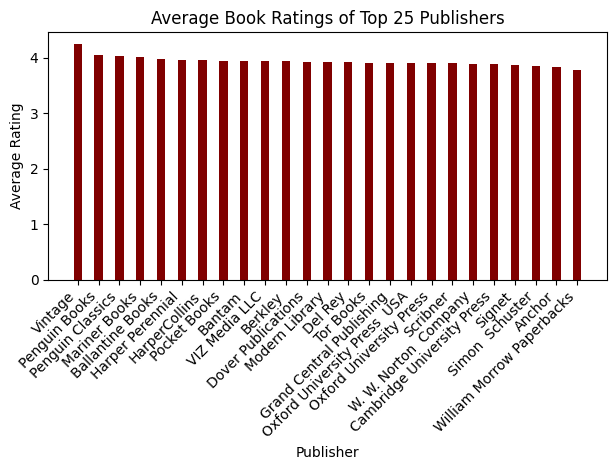

In [27]:
plt.bar(x=top_25, height=top25_avg_ratings, width=.4, color ='maroon')

plt.title('Average Book Ratings of Top 25 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()